In [39]:
import pandas as pd 
df=pd.read_csv('../complexe.csv')

In [16]:
import numpy as np
def rinkdistance(x):
    """Retourne la distance euclidienne entre des coordonnees (x,y) et le centre
    Args:
        x (np.array): (x,y)

    Returns:
        _type_: float
    """ 
    return np.linalg.norm(np.array(x) - np.array([0, 0]))
df['rinkdistance'] = df[['x', 'y']].apply(lambda x: rinkdistance(x), axis=1)
def periode(df):
    


(array([  2.,   2.,  22.,  49., 152.,  53.,  26.,  10.,   2.,   2.]),
 array([-1.2361864 , -0.97337601, -0.71056562, -0.44775524, -0.18494485,
         0.07786554,  0.34067592,  0.60348631,  0.86629669,  1.12910708,
         1.39191747]),
 <BarContainer object of 10 artists>)

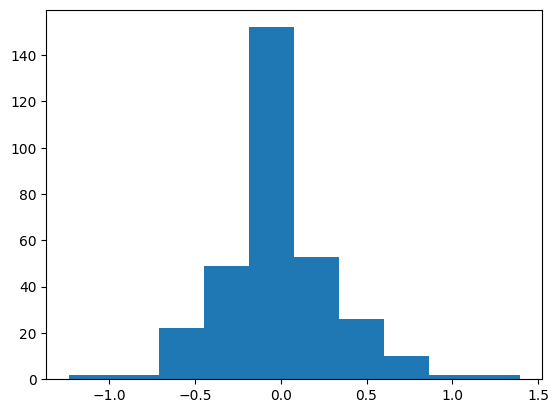

In [176]:

def shots_team_distance(df):
    # Calcul du nombre de tir par distance
    shot_per_distance=df.groupby('distance_bins').size()
    # Chaque match dure une heure, temps total dheures jouees par toutes les teams sur une saison
    total_hours=len(df.groupby('gameId'))
    #Nombre de shot par heure pour chaque distance
    shot_per_hour_bydistance=(shot_per_distance/(total_hours*2))
    #Nombre de shot sur une saison par team
    shot_per_team=df.groupby('teamId').size()
    #Nombre de game joué par team = nombre dheure par team
    time_total_per_team=df.groupby('teamId')['gameId'].nunique()
    #Nombre de shot par team et par distance
    number_of_shots_team_distance=df.groupby(['teamId','distance_bins']).size()
    #shot_per_hour_byteam=shot_per_team/time_total_per_team
    shot_per_hour_per_distance_per_team=number_of_shots_team_distance/time_total_per_team
    return (shot_per_hour_per_distance_per_team-shot_per_hour_bydistance)

In [181]:
def normalize_coordinates(row):
    x= row['x']
    period = row['period']
    powerplayhome = row['powerplayHome']
    powerplayaway = row['powerplayAway']
    # L'équipe à domicile commence du côté positif de x
    if powerplayhome or not powerplayaway: # Equipe Domicile
                return -x if (period % 2 == 1 and x<0) or (period % 2 == 0 and x>0)  else x
    else:  # Équipe visiteuse
            return -x if (period % 2 == 1 and x>0) or (period % 2 == 0 and x<0) else x
df[(df['powerplayHome']==True) &(df['period']%2==1) &(df['x']<0) ]

,Unnamed: 0,season,gameId,eventId,period,timeInPeriod,eventType,teamId,shooter,goalie,...,powerplayAway,coordinates,result,goal,x,y,distance,coordx,coordy,distance_bins
71,71,20162017,2016020002,18,1,03:45,shot-on-goal,16,Patrick Kane,Jake Allen,...,False,"['-76', '29']",no goal,0,-76.0,29.0,31.780497,23.0,71.0,"(30.0, 40.0]"
72,72,20162017,2016020002,20,1,04:37,shot-on-goal,16,Jonathan Toews,Jake Allen,...,False,"['-76', '2']",no goal,0,-76.0,2.0,13.152946,23.0,44.0,"(10.0, 20.0]"
73,73,20162017,2016020002,21,1,04:38,goal,16,Richard Panik,Jake Allen,...,False,"['-81', '-8']",goal,1,-81.0,-8.0,11.313708,18.0,34.0,"(10.0, 20.0]"
109,109,20162017,2016020002,445,3,08:13,shot-on-goal,16,Richard Panik,Jake Allen,...,False,"['-83', '7']",no goal,0,-83.0,7.0,9.219544,16.0,49.0,"(-0.001, 10.0]"
113,113,20162017,2016020002,604,3,10:26,shot-on-goal,16,Gustav Forsling,Jake Allen,...,False,"['-43', '19']",no goal,0,-43.0,19.0,49.769469,56.0,61.0,"(40.0, 50.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647589,647589,20232024,2023030415,1253,3,17:28,shot-on-goal,13,Aleksander Barkov,Stuart Skinner,...,False,"['-69', '-30']",no goal,0,-69.0,-30.0,36.055513,30.0,12.0,"(30.0, 40.0]"
647590,647590,20232024,2023030415,1264,3,18:21,shot-on-goal,13,Sam Reinhart,Stuart Skinner,...,False,"['-44', '2']",no goal,0,-44.0,2.0,45.044423,55.0,44.0,"(40.0, 50.0]"
647636,647636,20232024,2023030417,90,1,02:31,shot-on-goal,13,Sam Reinhart,Stuart Skinner,...,False,"['-69', '31']",no goal,0,-69.0,31.0,36.891733,30.0,73.0,"(30.0, 40.0]"
647666,647666,20232024,2023030417,1019,3,03:29,shot-on-goal,13,Aleksander Barkov,Stuart Skinner,...,False,"['-58', '22']",no goal,0,-58.0,22.0,38.013156,41.0,64.0,"(30.0, 40.0]"
